# Projeto 1 - Ciência dos dados - Vítor Calcete Marques

Para esse projeto é necessário escolher três indicadores disponíveis no Gapminder, sendo um deles o IDH(Índice de Desenvolvimento Humano), e outros dois livres para escolha. É preciso fazer uma pergunta para ser respondida com a análise dos dados dos indicadores.

Os indicadores escolhidos para esse projeto foram: IDH, População Total e Consumo total de eletricidade.

# Pergunta: População Total e Consumo de eletricidade são diretamente proporcionais ao IDH do país?

Resolvi investigar a relação de consumo de eletricidade, população total e IDH pois acredito que quanto maior o consumo de eletricidade maior é a tecnologia que o país utiliza, portanto maior seria seu IDH e a respeito da população acredito que quanto mais população um país tem maior é a chance de existir pessoas para desenvolver o país.


## Leitura dos arquivos 

In [14]:
%matplotlib inline
import pandas as pd
import numpy as np
import math as math
import matplotlib.pyplot as plt

In [15]:
#Leitura dos arquivos em Excel
DataHDI = pd.read_excel('hdi_human_development_index.xlsx')
DataEnergy = pd.read_excel('Indicator_Electricity consumption total.xlsx')
DataPopulation = pd.read_excel('population_total.xlsx')

In [21]:
DataHDI_2008 = DataHDI.loc[:, ["geo", 2008]]
DataEnergy_2008 = DataEnergy.loc[:, ["Electricity consumption, total (kWh)", "2008"]]
DataPopulation_2008 = DataPopulation.loc[:, ["geo", 2008]]


## Mudanças de índices

In [20]:
DataHDI_2008_idx = DataHDI_2008.set_index('geo')
DataEnergy_2008_idx = DataEnergy_2008.set_index("Electricity consumption, total (kWh)")
DataPopulation_2008_idx = DataPopulation_2008.set_index('geo')


## Junção de Dataframes 

In [19]:
DataJ = DataHDI_2008_idx.join(DataPopulation_2008_idx, how='inner', lsuffix='_IDH', rsuffix='_População total')
#mudando nome:
DataJ["IDH"]= DataJ.pop("2008_IDH")


In [26]:
# Dando Join do terceiro data frame
DataJoin = DataJ.join(DataEnergy_2008_idx, how='inner')
DataJoin.head(5)


#mudando nome:
DataJoin["População Total"]= DataJoin.pop("2008_População total")

DataJoin["Consumo total de eletricidade"]= DataJoin.pop("2008")


DataJoin = DataJoin.dropna() # Excluíndo os Nan da tabela

# Análise descritiva

In [36]:
DataJoin.describe() #descrever dados

,IDH,População Total,Consumo total de eletricidade
count,131.000000,1.310000e+02,1.310000e+02
mean,0.713267,4.935273e+07,1.391046e+11
std,0.144887,1.599816e+08,4.796720e+11
min,0.382000,3.110000e+05,2.290000e+08
25%,0.632500,4.390000e+06,5.915000e+09
50%,0.734000,1.080000e+07,1.912100e+10
75%,0.823000,3.660000e+07,7.345276e+10
max,0.936000,1.340000e+09,4.167195e+12


A partir da descrição dos dados feita acima, é possível, retirar que como a média do consumo total de eletricidade é maior que a mediana (em aproximadamente 10 vezes) podemos dizer que o consumo é assimétrico. Esse caso se repete com a população total e IDH, porém, com um grau de assimetria menor.

Também é possível perceber uma tendencia de aumento conjunto de todas as variaveis.



# Correlação

In [31]:
DataJoin.corr() # calcular correlação

,IDH,População Total,Consumo total de eletricidade
IDH,1.000000,-0.099513,0.176871
População Total,-0.099513,1.000000,0.626796
Consumo total de eletricidade,0.176871,0.626796,1.000000


Diferente da análise descritiva do pandar, a função correlação traz em porcentagem o quão relacionadas são as variáveis.

Sabendo disso e observando a correlação acima, podemos concluir que o IDH se relaciona muito pouco com o consumo total de eletricidade e com a população total é menor.

Porém a População total e o consumo total de eletricidade são 62% relacionados, é uma relação média-alta. Podemos deduzir que devido a grande população há mais pessoas usando eletronicos, eletrodomésticos, mais casas, mais trabalhos ,ou seja, há mais gasto de energia eletrica.

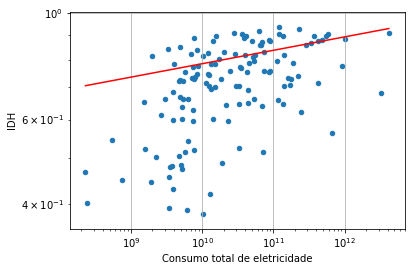

In [42]:
DataJoin.plot.scatter(y="IDH", x = "Consumo total de eletricidade",  loglog=True)

# Para usar as fórmulas da aula passada, precisamos calcular COV(X,Y), VAR(X) e VAR(Y), média de X e média de Y. 
# Neste nosso caso, X é a variável horsepower e Y é a variável acceleration.
cov = DataJoin["Consumo total de eletricidade"].cov(DataJoin["IDH"])

var_X = DataJoin["Consumo total de eletricidade"].var()
var_Y = DataJoin["IDH"].var()

mX = DataJoin["Consumo total de eletricidade"].mean()
mY = DataJoin["IDH"].mean()

# Agora podemos calcular a inclinação da reta de ajuste e a constante:
a = cov / var_X
b = mY - a*mX

plt.plot((DataJoin["Consumo total de eletricidade"].min(), DataJoin["Consumo total de eletricidade"].max()), 
         (a*DataJoin["Consumo total de eletricidade"].min() + b, a*DataJoin["Consumo total de eletricidade"].max() + b), color='red')
plt.grid(True)

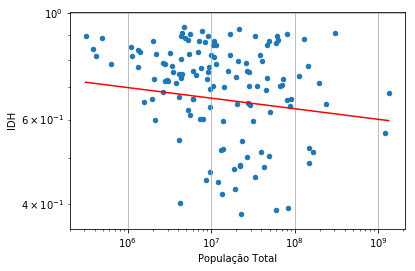

In [41]:
DataJoin.plot.scatter(y="IDH", x = "População Total",  loglog=True)
plt.grid()

# Para usar as fórmulas da aula passada, precisamos calcular COV(X,Y), VAR(X) e VAR(Y), média de X e média de Y. 
# Neste nosso caso, X é a variável horsepower e Y é a variável acceleration.
cov = DataJoin["População Total"].cov(DataJoin["IDH"])

var_X = DataJoin["População Total"].var()
var_Y = DataJoin["IDH"].var()

mX = DataJoin["População Total"].mean()
mY = DataJoin["IDH"].mean()

# Agora podemos calcular a inclinação da reta de ajuste e a constante:
a = cov / var_X
b = mY - a*mX

plt.plot((DataJoin["População Total"].min(), DataJoin["População Total"].max()), 
         (a*DataJoin["População Total"].min() + b, a*DataJoin["População Total"].max() + b), color='red')
plt.grid(True)

Text(0.5,1,'Figura 1')

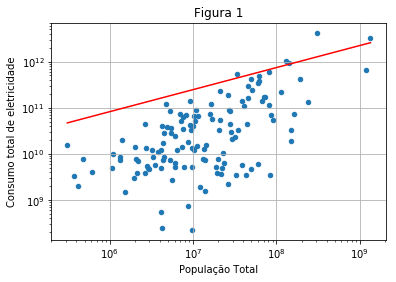

In [43]:
DataJoin.plot.scatter(y="Consumo total de eletricidade", x = "População Total",loglog=True)
plt.grid()

# Para usar as fórmulas da aula passada, precisamos calcular COV(X,Y), VAR(X) e VAR(Y), média de X e média de Y. 
# Neste nosso caso, X é a variável horsepower e Y é a variável acceleration.
cov = DataJoin["População Total"].cov(DataJoin["Consumo total de eletricidade"])

var_X = DataJoin["População Total"].var()
var_Y = DataJoin["Consumo total de eletricidade"].var()

mX = DataJoin["População Total"].mean()
mY = DataJoin["Consumo total de eletricidade"].mean()

# Agora podemos calcular a inclinação da reta de ajuste e a constante:
a = cov / var_X
b = mY - a*mX

plt.plot((DataJoin["População Total"].min(), DataJoin["População Total"].max()), 
         (a*DataJoin["População Total"].min() + b, a*DataJoin["População Total"].max() + b), color='red')
plt.grid(True)
plt.title("Figura 1")

Conforme observado no primeiro e segundo gráficos acima, a linha de tendencia vermelha confirma a baixa correlação descritiva pela função corr, do pandas.

Porém na figura 3 a linha de tendencia não apresenta a correlação de 62% da função corr. Isso ocorre porque a linha de tendencia é diferente da correlação de Pearson.
Na correlação mede o quanto uma variável se relaciona com outra variável, e na regressão linear(linha de tendencia) mede quanto uma variavel varia em função de outra variavel

# Conclusão

Com todas essas análises concluimos que o IDH possui uma correlação baixa com a população total e o consumo de eletricidade.
Então a População Total e o consumo de eletricidade não são fatores diretamentes proporcionais ao IDH.
Poém a População e o consumo de eletricidade são na maioria dos países diretamente proporcinais, seguindo a correlação.

Estas observações nos levam a questionar o porque existem países com pouca população, IDH alto e consumo de eletricidade alto. Podemos supor que indústrias usam muita eletricidade e com isso há esses países, o que pode ser investigado em trabalhos futuros.

## Créditos:

- Material da Aula 2
- Material da Aula 5
- Ajuda do aluno Bruno Winik para retirar os Nan com a função df.dropna()